In [63]:
from sympy import *
from IPython.display import display, Math
import numpy as np
init_printing(use_unicode=True)
import plotly.express as px
import plotly.graph_objects as go

In [8]:
from sympy import solve
x, y, sigma, mu, delta, alpha, beta, ro, eta, b, lambd = symbols(
    'x y σ μ δ α β ρ η b λ')
sigma_c = 0.1181
ro_c = 1.31
eta_c = 20.19
alpha_c = 1.636
beta_c = 0.002
delta_c = 0.3743
mu_c = 0.005
b_c = 0

dxdt = sigma + ro*x*y/(eta + y) - mu*x*y - delta*x
dydt = alpha*y*(1-beta*y)-x*y-(b*y)/(1+y)

concrete_params = {ro: ro_c, sigma: sigma_c, eta: eta_c, b: b_c,
                   alpha: alpha_c, beta: beta_c, mu: mu_c, delta: delta_c}
muless_params = dict(concrete_params)
del muless_params[mu]


In [9]:
display(Math('\dfrac{dx}{dt} = ' + latex(dxdt)))
display(Math('\dfrac{dy}{dt} = ' + latex(dydt)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Точки равновесия

### 1

In [10]:
display(Math('x = ' + latex(sigma/delta)))
display(Math('y = 0' )) # Решение не зависит от μ

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
# Остаьные равновесия аналитически не найти. Полином 5 степени.

In [12]:
def get_solutions(cur_mu=concrete_params[mu]):
    params = dict(concrete_params)
    params[mu] = cur_mu
    return solve([dxdt.subs(params), dydt.subs(params)], x,y)

In [74]:
def display_solutions(sols):
    for s in sols:
        display(s)

In [75]:
def display_sol_list(sol_list):
    for cur_mu, sols in sol_list:
        print(f"mu = {cur_mu}")
        display_solutions(sols)
        display("*"*20)

In [15]:
# for s in get_solutions():
#     display(s)

#### Бифуркационная диаграмма

In [27]:
mus = np.linspace(0.002, 0.022, 50)
# mus

In [28]:
from tqdm import tqdm

In [29]:
xs=[]
ys = []
mul = []
solutions_by_mu={}
for cur_mu in tqdm(mus):
    solutions = get_solutions(cur_mu)
    solutions_by_mu[cur_mu]= solutions
    # for s in solutions:
    #     if s[1]!=0:# and s[1].as_real_imag()[1]==0:#real
    #         ys.append(s[1].as_real_imag()[0])
    #         mul.append(cur_mu)
            
    

100%|███████████████████████████████████████████| 50/50 [01:40<00:00,  2.02s/it]


In [32]:
# for cur_mu, sols in list(solutions_by_mu.items()):
#     print(f"mu = {cur_mu}")
#     display_solutions(sols)
#     display("*"*20)

In [76]:
sols_list = list(solutions_by_mu.items())
display_sol_list(sols_list[:8])

mu = 0.002


'********************'

mu = 0.0024081632653061226


'********************'

mu = 0.0028163265306122448


'********************'

mu = 0.0032244897959183673


'********************'

mu = 0.0036326530612244895


'********************'

mu = 0.0040408163265306125


'********************'

mu = 0.004448979591836735


'********************'

mu = 0.004857142857142857


'********************'

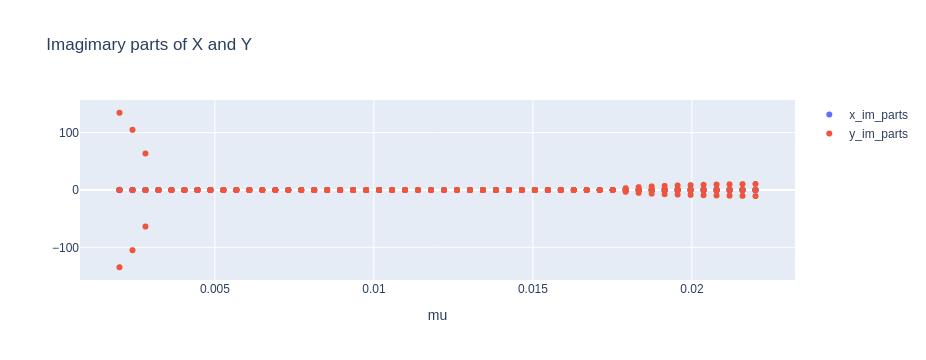

In [80]:
y_im_parts = []
x_im_parts = []
mus_for_im=[]
for cur_mu, sols in list(solutions_by_mu.items()):
    for x,y in sols:
        x_im_parts.append(float(x.as_real_imag()[1]))
        y_im_parts.append(float(y.as_real_imag()[1]))
        mus_for_im.append(cur_mu)
            
fig = go.Figure()
fig.add_trace(go.Scatter(x=mus_for_im, y=x_im_parts, mode='markers', name = "x_im_parts"))
fig.add_trace(go.Scatter(x=mus_for_im, y=y_im_parts, mode='markers', name = "y_im_parts"))
fig.update_layout(title="Imagimary parts of X and Y")
fig.update_layout(xaxis={"title": "mu"})


На отрезке [0.005, 0.015] мнимая часть близка к нулю

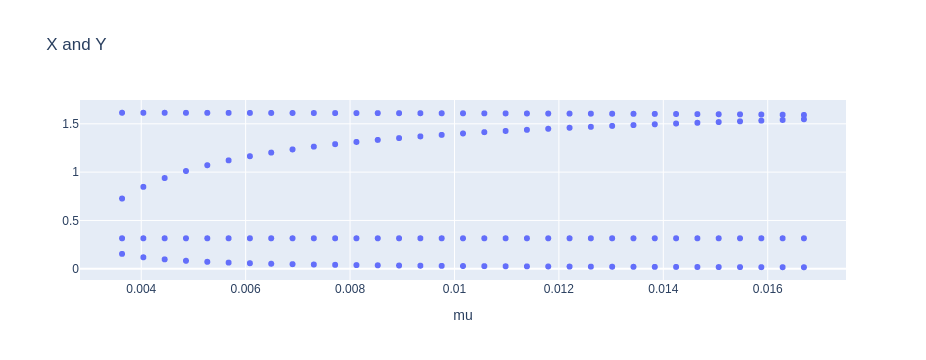

In [83]:
mu_min = 0.0036
mu_max = 0.017
xs=[]
ys=[]
mus_bif = []
for cur_mu, sols in list(solutions_by_mu.items()):
    for x,y in sols:
        if mu_min<cur_mu<mu_max:
            mus_bif.append(cur_mu)
            xs.append(float(x.as_real_imag()[0]))
            ys.append(float(x.as_real_imag()[0]))
            
fig = go.Figure()
fig.add_trace(go.Scatter(x=mus_bif, y=ys, mode='markers', name = "x_im_parts"))
# fig.add_trace(go.Scatter(x=mus_for_im, y=y_im_parts, mode='markers', name = "y_im_parts"))
fig.update_layout(title="X and Y")
fig.update_layout(xaxis={"title": "mu"})